-- Correlation
liest CSV-Dateien und erstellt eine Korrelationsmatrix.
verwendet getQuotes.sh zum Holen der Daten.

✓ ToDo: Ökoworld Klima und Classic ergänzt

In [200]:
import pandas as pd

In [201]:
import numpy as np

In [202]:
import matplotlib.pyplot as plt

In [203]:
import seaborn as sns

In [204]:
from datetime import datetime
from datetime import date
from datetime import timedelta

In [205]:
def floatconv(val):
    try:
        if val.strip():
            return float(val.replace('.','').replace(',','.'))
        else:
            return 0
    except ValueError as ve:
        print("VALUE NOT USABLE: #{}#".format(val))

In [206]:
intconv = lambda val: 0 if len(str(val)) < 2 else float(str(val).replace('.',''))
converter = {'Erster':floatconv, 'Hoch':floatconv, 'Tief':floatconv, 'Schlusskurs':floatconv, 'Volumen':intconv}

historische Kurse holen von hier:  
http://www.ariva.de/dax-index/historische_kurse  
typischerweise ca. 10 Jahre, Trenner ;

In [207]:
wkn2name = {"865985":"Apple", "A1EWWW":"Adidas", "A0WMPJ":"Aixtron", "846900":"DAX","A0KRKM":"Brent Oil",
           "COM062":"Brent Oil (Subst)", "581005":"Deutsche Börse", "555750":"DTE", "927200":"Dialog Semiconductor", 
           "555063":"Drägerwerk", "976986":"DWS Akt. St. DL",
           "ETF047" : "PSI (ETF047)", "965508": "PSI20", "577220" : "Fielmann", "A0Z2ZZ":"Freenet",
           "840221":"Hannover Rück","851399":"IBM","623100":"Infineon","KGX888":"Kion","LS9AJF":"LS9AJF",
           "846741":"MDAX","A0D655":"Nordex","A0HGV0":"MSCI iShares", "A2H9QY":"MSCI Amundi", "918422":"Nvidia","871460":"Oracle","PSM777":"ProSieben",
           "716460":"SAP","A2GS40":"Software AG","716563":"Sartorius","A0AET0":"S&P 500","720327":"TecDAX",
           "850775":"Telefonica","766710":"Vossloh","LS9CTA":"LS9CTA", "LS9HYC":"LS9HYC", "973277":"Fid. Nordic",
            "973270":"Fid. Eur Gr.","973346":"Nordea 1 Nordic","977479":"Lingohr","A1103F":"XTr MinVol",
           "A0Q9NX" : "SEB Nordic Small Caps", "A1W4TN":"Fid. Gl.Tec", "978041": "LBBW", "A0MX8G" : "Öko Klima", "974968": "Ökovision"}

name2wkn = {}
for wkn, name in wkn2name.items():
  name2wkn[name] = wkn
name2wkn['Apple']

'865985'

In [208]:
data_dir = "data/"

def get_filename(wp_name):
    return  data_dir+"wkn_"+name2wkn[wp_name]+"_historic.csv"

In [209]:
#wp_names = ["DAX","TecDAX","Infineon","SAP", "MSCI","LS9AJF","Fid. Nordic","Nordea 1 Nordic","Fid. Eur Gr.","Lingohr"]
#wp_names = ["DAX","SAP"]
wp_names = ["DAX","Infineon","MSCI Amundi","Lingohr","TecDAX", "Fid. Gl.Tec", "LBBW","LS9AJF", "MSCI iShares","Fid. Nordic", 
            "DTE", "Brent Oil", "Fid. Eur Gr.", "DWS Akt. St. DL","XTr MinVol","SEB Nordic Small Caps", "Öko Klima", "Ökovision"]
i=0
for wp_name in wp_names: 
    filename = get_filename(wp_name)
    qu = pd.read_csv(filename, sep=";", converters=converter)
    qu = qu[qu['Schlusskurs'] > 0]
    qu['Date'] = pd.to_datetime(qu['Datum'])
    qu.set_index('Date', inplace=True)
    qu_rev = qu[::-1].copy()
    #calculate weekly changes
    qu_rev[wp_name] = qu_rev['Schlusskurs'].pct_change(periods=5)
    if i==0:
        pct_changes = qu_rev.copy()
        i+=1
    pct_changes[wp_name] = qu_rev[wp_name].copy()
pct_changes = pct_changes.drop(['Datum','Erster','Hoch','Tief','Volumen','Schlusskurs'],axis=1)    
#pct_changes['DAXI'] = pct_changes['DAX'].copy()
#cut first and last value:
pct_changes = pct_changes[5:-2].copy()
#take every 5th value:
pct_changes = pct_changes.iloc[::5].copy()
pct_changes

,DAX,Infineon,MSCI Amundi,Lingohr,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
Date,,,,,,,,,,,,,,,,,,
2018-09-13,0.008390,-0.054470,0.005177,-0.000661,-0.006360,0.002233,0.010505,0.013409,0.008393,0.005076,0.019725,0.017331,0.014993,0.007915,0.005996,0.017537,0.009039,0.008923
2018-09-20,0.022473,0.052958,0.008827,0.022964,-0.017953,0.008021,0.025031,0.003974,0.015489,0.012987,0.010219,0.002326,0.005779,0.015489,-0.001159,0.013075,-0.014609,-0.011217
2018-09-27,0.008852,-0.025270,0.003751,0.002180,0.002878,0.011052,0.002069,-0.002602,-0.002390,-0.001425,0.016980,0.043754,0.013409,0.002903,0.001783,0.006922,-0.003916,-0.003054
2018-10-05,-0.026029,-0.006292,-0.005959,-0.008541,-0.030979,-0.031004,-0.026021,-0.019187,-0.014753,-0.020714,-0.004263,0.057681,-0.023309,-0.040049,-0.003583,-0.018883,-0.028149,-0.018664
2018-10-12,-0.048555,-0.081054,-0.044815,-0.055505,-0.058347,-0.041460,-0.054071,-0.092034,-0.040630,-0.051787,-0.011416,-0.054783,-0.049035,-0.075482,-0.035314,-0.049625,-0.076570,-0.058114
2018-10-19,0.002605,-0.030044,0.005084,0.008777,0.025273,0.001410,0.001792,0.023298,-0.000459,-0.015385,0.057741,-0.000720,0.002716,0.010186,0.018608,-0.001220,0.024379,0.016709
2018-10-26,-0.030571,-0.082694,-0.028431,-0.041795,-0.053507,-0.020188,-0.040500,-0.051533,-0.038982,-0.050781,-0.031047,-0.019115,-0.018947,-0.036917,-0.018226,-0.044390,-0.036987,-0.025958
2018-11-02,0.028424,0.150248,0.027446,0.030354,0.063736,0.048395,0.029210,0.052652,0.027741,0.049383,0.013380,-0.056527,0.026208,0.048665,0.014982,NaN,0.038462,0.016127
2018-11-09,0.000883,-0.020199,0.015661,0.014773,-0.000911,0.010969,0.002681,0.003995,0.013638,-0.021961,0.021195,-0.031690,0.006719,-0.008857,0.024707,0.024769,0.016529,0.014284


In [210]:
corr = pct_changes.corr()
corr

,DAX,Infineon,MSCI Amundi,Lingohr,TecDAX,Fid. Gl.Tec,LBBW,LS9AJF,MSCI iShares,Fid. Nordic,DTE,Brent Oil,Fid. Eur Gr.,DWS Akt. St. DL,XTr MinVol,SEB Nordic Small Caps,Öko Klima,Ökovision
DAX,1.000000,0.687045,0.776106,0.832107,0.836503,0.778673,0.935724,0.524942,0.816614,0.825443,0.310318,0.302365,0.916088,0.957226,0.554095,0.818307,0.626590,0.649812
Infineon,0.687045,1.000000,0.620427,0.771576,0.698852,0.709268,0.727799,0.483988,0.632356,0.720290,0.086763,0.206910,0.640657,0.718036,0.271398,0.505350,0.538898,0.536656
MSCI Amundi,0.776106,0.620427,1.000000,0.826692,0.756037,0.897492,0.859587,0.638522,0.944992,0.815622,0.250921,0.458736,0.867185,0.826297,0.864473,0.830155,0.823205,0.800409
Lingohr,0.832107,0.771576,0.826692,1.000000,0.728291,0.856603,0.870270,0.490845,0.840226,0.798237,0.285515,0.375004,0.872291,0.814093,0.583691,0.728061,0.731182,0.758538
TecDAX,0.836503,0.698852,0.756037,0.728291,1.000000,0.752370,0.803776,0.626501,0.738761,0.767805,0.250250,0.295105,0.793716,0.870205,0.599679,0.761984,0.706330,0.723191
Fid. Gl.Tec,0.778673,0.709268,0.897492,0.856603,0.752370,1.000000,0.842927,0.575501,0.854652,0.824676,0.293017,0.456397,0.866523,0.807087,0.698688,0.768350,0.799253,0.765574
LBBW,0.935724,0.727799,0.859587,0.870270,0.803776,0.842927,1.000000,0.631941,0.888714,0.867000,0.292658,0.353680,0.911390,0.941363,0.633452,0.849569,0.711657,0.722936
LS9AJF,0.524942,0.483988,0.638522,0.490845,0.626501,0.575501,0.631941,1.000000,0.640109,0.526059,0.129208,0.296601,0.527882,0.650409,0.611080,0.611648,0.713546,0.678109
MSCI iShares,0.816614,0.632356,0.944992,0.840226,0.738761,0.854652,0.888714,0.640109,1.000000,0.851308,0.218317,0.380130,0.859504,0.861486,0.787659,0.855758,0.823120,0.798002
Fid. Nordic,0.825443,0.720290,0.815622,0.798237,0.767805,0.824676,0.867000,0.526059,0.851308,1.000000,0.258101,0.444699,0.846528,0.850157,0.553690,0.819165,0.674024,0.662570


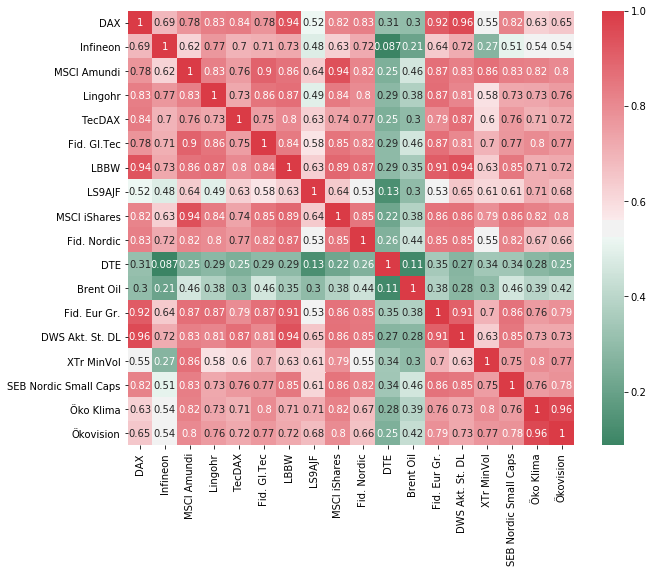

In [211]:
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cbar_kws={},cmap = cmap, annot=True, ax=ax)

In [212]:
#End